In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import f, chi2_contingency

#### ***Contexto***

Você é analista de dados júnior em uma empresa de tecnologia. O time de Recursos Humanos acredita que fatores como departamento, nível de experiência e satisfação com o salário podem impactar a satisfação geral dos funcionários. Eles querem tomar decisões baseadas em dados para direcionar ações de retenção de talentos e melhorias internas.

O time quer sua ajuda para responder às seguintes **perguntas**:
- A variabilidade da satisfação dos funcionários é a mesma em todos os departamentos? 
- Existe associação entre o nível de satisfação com o salário (baixo, médio, alto) e a intenção de sair da empresa?
- A média de satisfação geral difere entre departamentos?

***Dados disponíveis***

Você recebeu uma base de dados com as seguintes colunas:
- **Department**: departamento do funcionário (ex: TI, RH, Comercial, etc.)
- **JobSatisfaction**: satisfação geral do funcionário (escala de 0 a 1)
- **JobLevel**: proxy para o nível salarial (low, medium, high)
- **Attrition**: se o funcionário saiu ou não da empresa (0 = não, 1 = sim)
- **YearsAtCompany**: tempo de casa em anos


#### **EDA**

In [ ]:

df_funcionarios = pd.read_csv('../data/05. Teste de hipóteses variância, associação e ANOVA/data.csv')

print(df_funcionarios.shape)
display(
    pd.DataFrame({
        'Tipo': df_funcionarios.dtypes,
        'Qtde nulos': df_funcionarios.isnull().sum(),
        'Proporção nulos': df_funcionarios.isnull().mean(),
        'Qtde unicos': df_funcionarios.nunique(),
        'Exemplo unicos': df_funcionarios.apply(lambda x: x.unique()[:3])
    })
)

(1470, 35)


,Tipo,Qtde nulos,Proporção nulos,Qtde unicos,Exemplo unicos
Age,int64,0,0.0,43,"[41, 49, 37]"
Attrition,object,0,0.0,2,"[Yes, No]"
BusinessTravel,object,0,0.0,3,"[Travel_Rarely, Travel_Frequently, Non-Travel]"
DailyRate,int64,0,0.0,886,"[1102, 279, 1373]"
Department,object,0,0.0,3,"[Sales, Research & Development, Human Resources]"
DistanceFromHome,int64,0,0.0,29,"[1, 8, 2]"
Education,int64,0,0.0,5,"[2, 1, 4]"
EducationField,object,0,0.0,6,"[Life Sciences, Other, Medical]"
EmployeeCount,int64,0,0.0,1,[1]
EmployeeNumber,int64,0,0.0,1470,"[1, 2, 4]"


alguns graficos curiosos. graficos em azul escuro são os "targets" do problema.


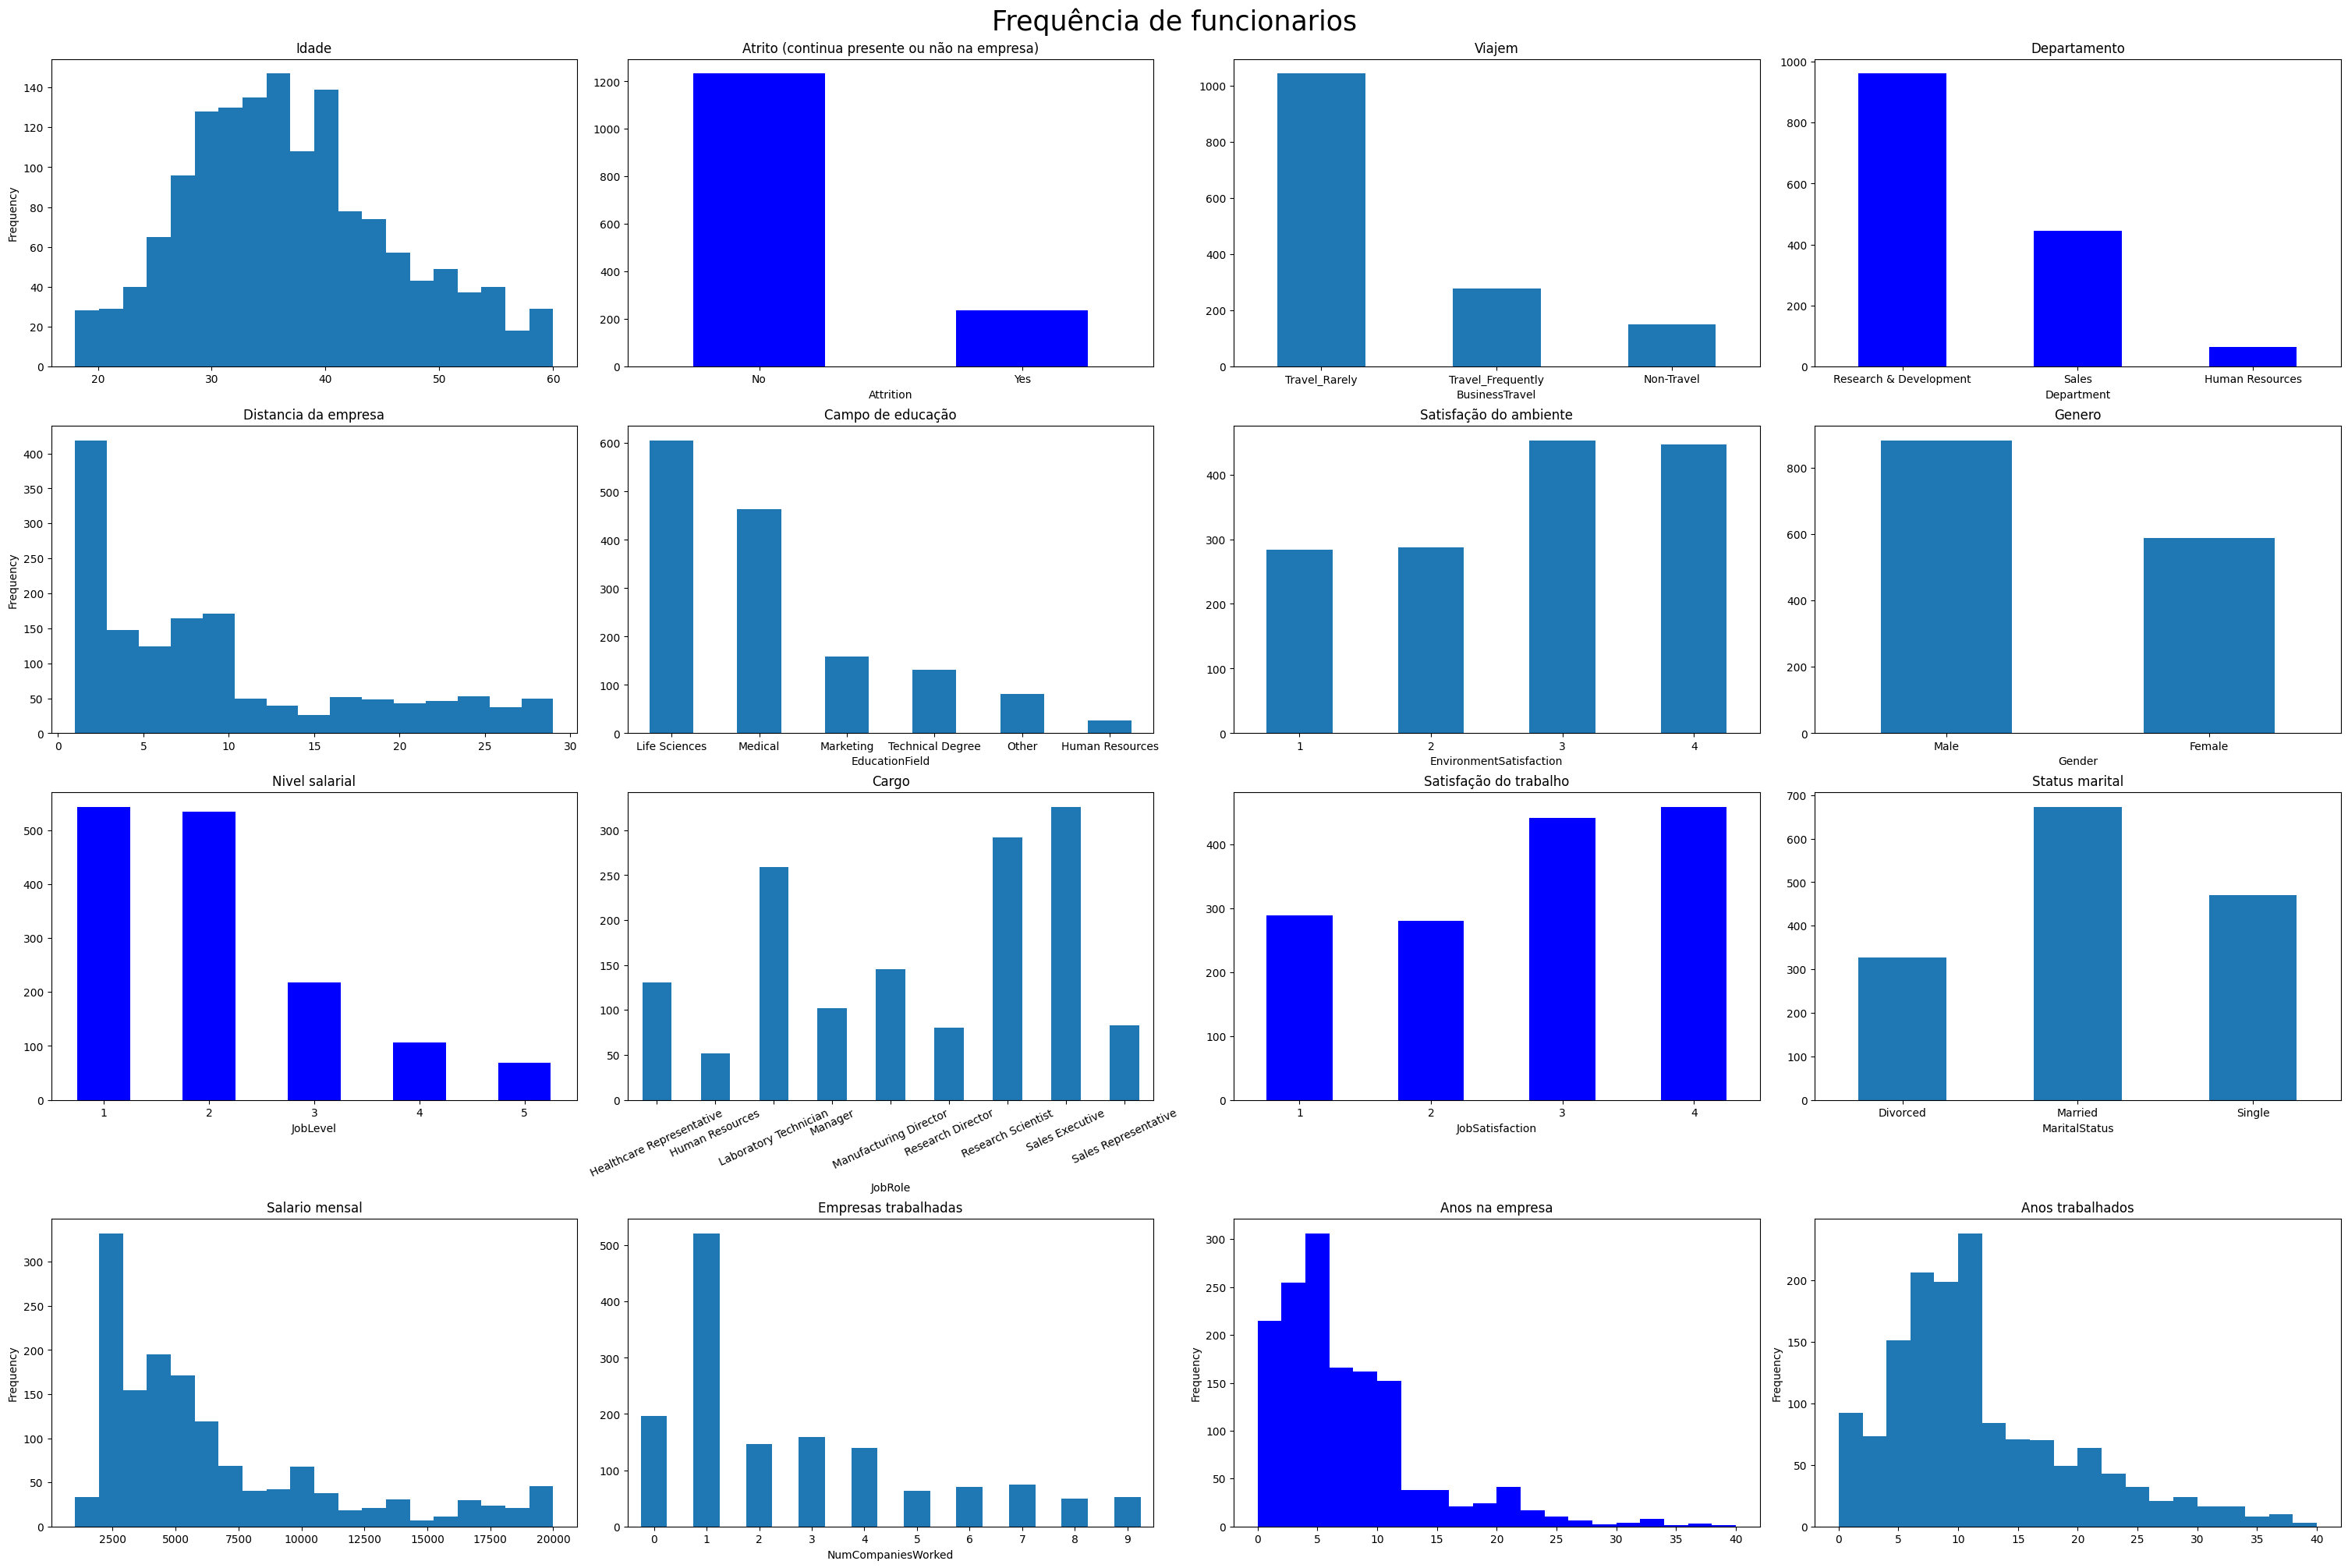

In [ ]:

print('alguns graficos curiosos. graficos em azul escuro são os "targets" do problema.')

plt.close('all')

fig, axs = plt.subplots(4, 4, figsize=(30, 20), constrained_layout=True)
fig.suptitle('Frequência de funcionarios', fontsize=25)

df_funcionarios['Age'].plot.hist(ax=axs[0][0], bins=20, title='Idade')
df_funcionarios['Attrition'].value_counts().plot.bar(ax=axs[0][1], title='Atrito (continua presente ou não na empresa)', rot=0, color='b')
df_funcionarios['BusinessTravel'].value_counts().plot.bar(ax=axs[0][2], title='Viajem', rot=0)
df_funcionarios['Department'].value_counts().plot.bar(ax=axs[0][3], title='Departamento', rot=0, color='b')
df_funcionarios['DistanceFromHome'].plot.hist(ax=axs[1][0], bins=15, title='Distancia da empresa')
df_funcionarios['EducationField'].value_counts().plot.bar(ax=axs[1][1], title='Campo de educação', rot=0)
df_funcionarios['EnvironmentSatisfaction'].value_counts().sort_index().plot.bar(ax=axs[1][2], title='Satisfação do ambiente', rot=0)
df_funcionarios['Gender'].value_counts().plot.bar(ax=axs[1][3], title='Genero', rot=0)
df_funcionarios['JobLevel'].value_counts().sort_index().plot.bar(ax=axs[2][0], title='Nivel salarial', rot=0, color='b')
df_funcionarios['JobRole'].value_counts().sort_index().plot.bar(ax=axs[2][1], title='Cargo', rot=25)
df_funcionarios['JobSatisfaction'].value_counts().sort_index().plot.bar(ax=axs[2][2], title='Satisfação do trabalho', rot=0, color='b')
df_funcionarios['MaritalStatus'].value_counts().sort_index().plot.bar(ax=axs[2][3], title='Status marital', rot=0)
df_funcionarios['MonthlyIncome'].plot.hist(ax=axs[3][0], bins=20, title='Salario mensal')
df_funcionarios['NumCompaniesWorked'].value_counts().sort_index().plot.bar(ax=axs[3][1], title='Empresas trabalhadas', rot=0)
df_funcionarios['TotalWorkingYears'].plot.hist(ax=axs[3][3], bins=20, title='Anos trabalhados')
df_funcionarios['YearsAtCompany'].plot.hist(ax=axs[3][2], bins=20, title='Anos na empresa', color='b')

plt.show()

#### **Principal**

##### - *A variabilidade da satisfação dos funcionários é a mesma em todos os departamentos?* 
##### - *A média de satisfação geral difere entre departamentos?* 

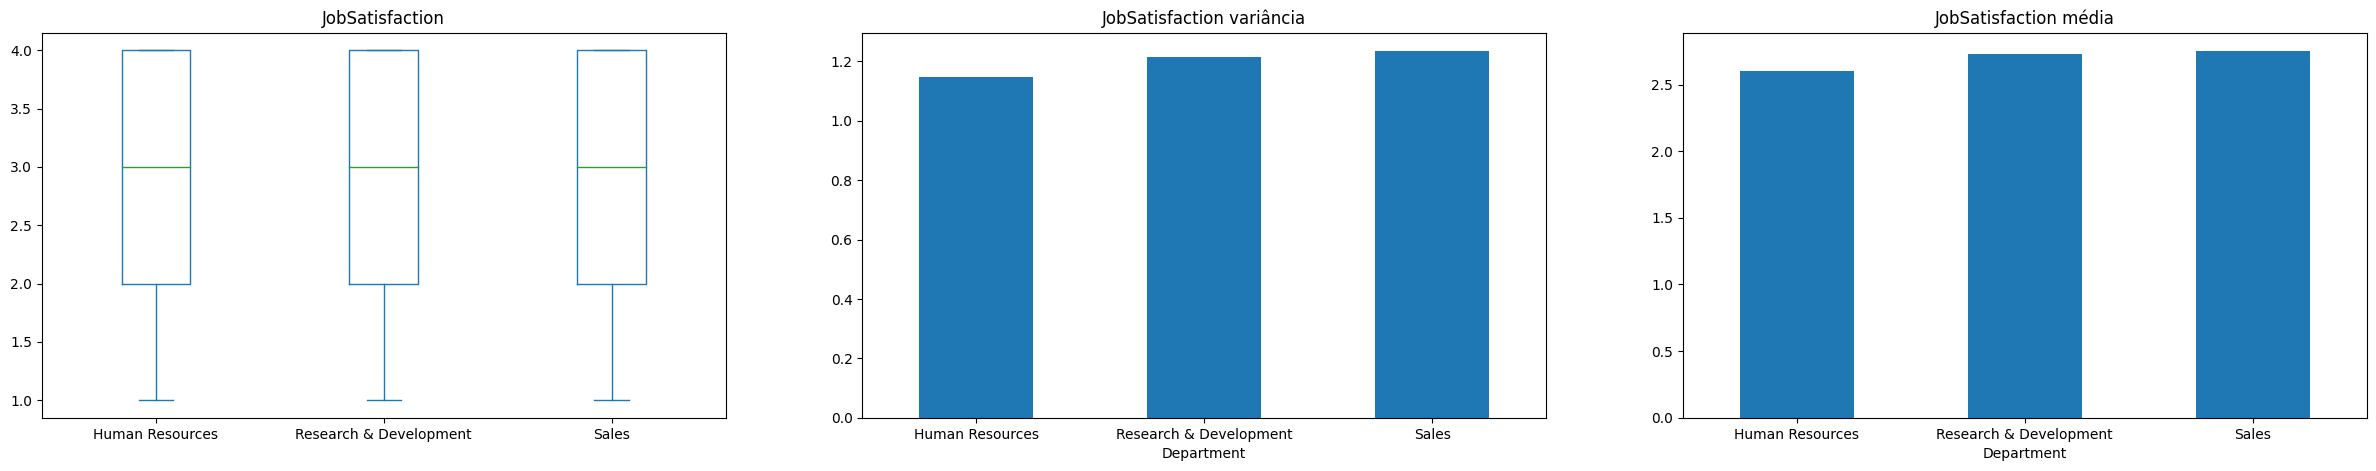

In [ ]:

plt.close('all')

fig, axs = plt.subplots(1, 3, figsize=(30, 5))

df_funcionarios[['JobSatisfaction','Department']].plot.box(by='Department', ax=axs[0])
df_funcionarios.groupby('Department')['JobSatisfaction'].var().plot.bar(ax=axs[1], rot=0, title='JobSatisfaction variância')
df_funcionarios.groupby('Department')['JobSatisfaction'].mean().plot.bar(ax=axs[2], rot=0, title='JobSatisfaction média')

plt.show()

In [98]:

df_f_jobsatis_stats = df_funcionarios.groupby('Department')[['JobSatisfaction']].agg(count=('JobSatisfaction', 'count'), var=('JobSatisfaction', 'var'), mean=('JobSatisfaction', 'mean')).reset_index()
display(df_f_jobsatis_stats)

,Department,count,var,mean
0,Human Resources,63,1.146441,2.603175
1,Research & Development,961,1.213567,2.726327
2,Sales,446,1.234549,2.751121


In [99]:

## teste de hipoteses para variancia

# Human Resources
s21 = df_f_jobsatis_stats[df_f_jobsatis_stats['Department'] == 'Human Resources']['var'].values[0]
n1 = df_f_jobsatis_stats[df_f_jobsatis_stats['Department'] == 'Human Resources']['count'].values[0]
df1 = n1-1
# Research & Development	
s22 = df_f_jobsatis_stats[df_f_jobsatis_stats['Department'] == 'Research & Development']['var'].values[0]
n2 = df_f_jobsatis_stats[df_f_jobsatis_stats['Department'] == 'Research & Development']['count'].values[0]
df2 = n2-1
# Sales
s23 = df_f_jobsatis_stats[df_f_jobsatis_stats['Department'] == 'Sales']['var'].values[0]
n3 = df_f_jobsatis_stats[df_f_jobsatis_stats['Department'] == 'Sales']['count'].values[0]
df3 = n3-1

a = .05
c = 1-a

# 1.
# h0: s23 = s22
# ha: s23 > s22

f_calculado = s23/s22

f_critico = f.ppf(c, df3, df2)
#print('i.', 'h0 aceita' if f_calculado < f_critico else 'h0 rejeitada', f'-- f calculado: {f_calculado}, f critico: {f_critico}')

p_value = 1-f.cdf(f_calculado, df3, df2)
print('ii.', 'h0 (s23 = s22) aceita' if p_value > a else 'h0 rejeitada', f'-- p-value: {p_value}, alpha: {a}')

# 2.
# h0: s23 = s21
# ha: s23 > s21

f_calculado = s23/s21

f_critico = f.ppf(c, df3, df1)
#print('i.', 'h0 aceita' if f_calculado < f_critico else 'h0 rejeitada', f'-- f calculado: {f_calculado}, f critico: {f_critico}')

p_value = 1-f.cdf(f_calculado, df3, df1)
print('ii.', 'h0 (s23 = s21) aceita' if p_value > a else 'h0 rejeitada', f'-- p-value: {p_value}, alpha: {a}')

## s23 = s22 e s23 = s21 então s23 = s21
# obs.: não da pra usar isso com confiança em testes de hipoteses, o ideal é usar outro teste para comparar 3+ grupos... como não foi apresentado no curso então não usarei aqui por agora.

print()
print('Temos evidencias suficientes a um nivel de confiança de 95% para dizer que a variabilidade da satisfação no trabalho é a mesma pra todos os departamentos.')

ii. h0 (s23 = s22) aceita -- p-value: 0.41238409706884804, alpha: 0.05
ii. h0 (s23 = s21) aceita -- p-value: 0.36929608601149044, alpha: 0.05

Temos evidencias suficientes a um nivel de confiança de 95% para dizer que a variabilidade da satisfação no trabalho é a mesma pra todos os departamentos.


In [120]:

## teste de hipoteses para as medias

### h0: as médias são iguais
### ha: pelo menos 1 média é diferente

alpha = .05

satisfacoes = [df_funcionarios[df_funcionarios['Department']==dept]['JobSatisfaction'].to_list() for dept in df_funcionarios['Department'].unique()]

k = len(satisfacoes)
media_geral = df_funcionarios['JobSatisfaction'].mean()

SQ_entre = 0
for i in range(k): SQ_entre += len(satisfacoes[i])*(np.mean(satisfacoes[i])-media_geral)**2
gl_entre = k-1

SQ_dentro = 0
for i in range(k): SQ_dentro += np.var(satisfacoes[i], ddof=1)*(len(satisfacoes[i])-1)
gl_dentro = (len(satisfacoes[0])+len(satisfacoes[1])+len(satisfacoes[2]))-k

f_statistic = (SQ_entre/gl_entre)/(SQ_dentro/gl_dentro)

p_value = 1-f.cdf(f_statistic, gl_entre, gl_dentro)
print('ii. h0 (m1=...=mk)', 'rejeitada' if p_value <= alpha else 'aceita', f'-- p-value: {p_value}, alpha: {alpha}')

print()
print('Temos evidencias suficientes a um nivel de confiança de 95% para dizer que a média da satisfação no trabalho é a mesma pra todos os departamentos.')

ii. h0 (m1=...=mk) aceita -- p-value: 0.6053484180286604, alpha: 0.05

Temos evidencias suficientes a um nivel de confiança de 95% para dizer que a média da satisfação no trabalho é a mesma pra todos os departamentos.


##### - *Existe associação entre o nível de satisfação com o salário (baixo, médio, alto) e a intenção de sair da empresa?* 

In [ ]:

df = df_funcionarios.groupby(['JobLevel','Attrition'])['EmployeeNumber'].count().reset_index().pivot_table(values='EmployeeNumber', index='JobLevel', columns='Attrition').reset_index()
df.index = df['JobLevel']
df.drop('JobLevel', axis=1, inplace=True)

display(df)

# h0: as variaveis JobLevel e Attrition NÃO são associadas <-> são independentes.
# ha: as variaveis JobLevel e Attrition são associadas <-> são dependentes.

res = chi2_contingency(df)
chi2_stat = res[0]
p_value = res[1]

a = .05

print(f"h0{' rejeitada:' if p_value <= a else ' aceita:'} p-value = {p_value}")
print(f"temos evidencias a um nivel de significancia de {a} que o nivel de satisfação com o salário{' ' if p_value <= a else ' NÃO '}esta associado com a intenção de sair da empresa, sendo assim não sabemos a direção da associação, i.e. quem é a variavel dependente e a independete")

Attrition,No,Yes
JobLevel,,
1,400.0,143.0
2,482.0,52.0
3,186.0,32.0
4,101.0,5.0
5,64.0,5.0


h0 rejeitada: p-value = 6.634684715458957e-15
temos evidencias a um nivel de significancia de 0.05 que o nivel de satisfação com o salário esta associado com a intenção de sair da empresa, sendo assim não sabemos a direção da associação, i.e. quem é a variavel dependente e a independete


In [ ]:

df['No'] = df['No']/df['No'].sum()
df['Yes'] = df['Yes']/df['Yes'].sum()
display(df)

Attrition,No,Yes
JobLevel,,
1,0.324412,0.603376
2,0.390916,0.219409
3,0.150852,0.135021
4,0.081914,0.021097
5,0.051906,0.021097


##### **Resumo**

- **1 e 3** -> A **variabilidade** e a **média** de satisfação dos funcionario *é a mesma* para todos os departamentos.
- **2**     -> Existe uma **associação** entre o *nivel salarial* e a *permanencia na empresa*.